In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [10]:
import os
import matplotlib.pyplot as plt
import cv2

In [11]:
len(os.listdir('/kaggle/input/global-wheat-detection/train'))

3422

944c60a15.jpg


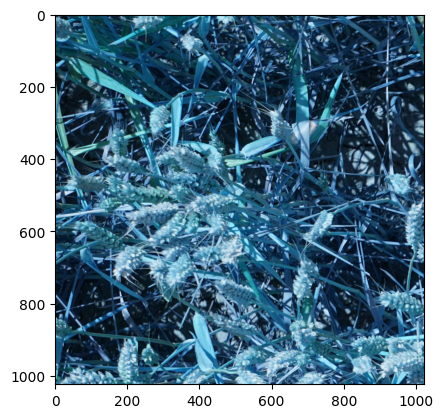

In [12]:
for file in os.listdir('/kaggle/input/global-wheat-detection/train'):
    image = os.path.join('/kaggle/input/global-wheat-detection/train',file)
    print(file)
    img = cv2.imread(image)
    plt.imshow(img)
    break
    

In [13]:
df = pd.read_csv('/kaggle/input/global-wheat-detection/train.csv')

In [14]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [21]:
df['image_id'].unique()

array(['b6ab77fd7', 'b53afdf5c', '7b72ea0fb', ..., 'a5c8d5f5c',
       'e6b5e296d', '5e0747034'], dtype=object)

In [ ]:
plt.imshow(cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg'))

In [ ]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b6ab77fd7.jpg')
x_min = 834.0
y_min = 222.0
x_max = (834.0+56.0)
y_max = (222.0+36.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 226.0
y_min = 548.0
x_max = (226.0+130.0)
y_max = (548.0+58.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)
x_min = 834.0
y_min = 95.0
x_max = (834.0+109.0)
y_max = (95.0+107.0)

cv2.rectangle(image,(int(x_min),int(y_min),int(x_max),int(y_max)),(0,255,0),2)

plt.imshow(image)


Let's visualize one image with all the bboxes for that image

In [25]:
one_image_info = df[df['image_id']=='b53afdf5c']
one_image_info.head()

,image_id,width,height,bbox,source
47,b53afdf5c,1024,1024,"[988.0, 781.0, 36.0, 96.0]",usask_1
48,b53afdf5c,1024,1024,"[331.0, 863.0, 70.0, 95.0]",usask_1
49,b53afdf5c,1024,1024,"[47.0, 226.0, 65.0, 46.0]",usask_1
50,b53afdf5c,1024,1024,"[682.0, 974.0, 108.0, 50.0]",usask_1
51,b53afdf5c,1024,1024,"[63.0, 988.0, 156.0, 36.0]",usask_1


In [44]:
(one_image_info['bbox'].iloc[0].strip('[]').split(',')[0])

'988.0'

In [56]:
one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
one_image_info['X_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[2])+float(x.strip('[]').split(',')[0]))
one_image_info['y_max'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[3])+float(x.strip('[]').split(',')[1]))

/tmp/ipykernel_24/1383295360.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_image_info['X_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[0]))
/tmp/ipykernel_24/1383295360.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_image_info['y_min'] = one_image_info['bbox'].apply(lambda x: float(x.strip('[]').split(',')[1]))
/tmp/ipykernel_24/1383295360.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [57]:
one_image_info

,image_id,width,height,bbox,source,X_min,y_min,X_max,y_max
47,b53afdf5c,1024,1024,"[988.0, 781.0, 36.0, 96.0]",usask_1,988.0,781.0,1024.0,877.0
48,b53afdf5c,1024,1024,"[331.0, 863.0, 70.0, 95.0]",usask_1,331.0,863.0,401.0,958.0
49,b53afdf5c,1024,1024,"[47.0, 226.0, 65.0, 46.0]",usask_1,47.0,226.0,112.0,272.0
50,b53afdf5c,1024,1024,"[682.0, 974.0, 108.0, 50.0]",usask_1,682.0,974.0,790.0,1024.0
51,b53afdf5c,1024,1024,"[63.0, 988.0, 156.0, 36.0]",usask_1,63.0,988.0,219.0,1024.0
52,b53afdf5c,1024,1024,"[824.0, 901.0, 49.0, 77.0]",usask_1,824.0,901.0,873.0,978.0
53,b53afdf5c,1024,1024,"[815.0, 413.0, 90.0, 72.0]",usask_1,815.0,413.0,905.0,485.0
54,b53afdf5c,1024,1024,"[468.0, 161.0, 172.0, 66.0]",usask_1,468.0,161.0,640.0,227.0
55,b53afdf5c,1024,1024,"[888.0, 537.0, 76.0, 74.0]",usask_1,888.0,537.0,964.0,611.0
56,b53afdf5c,1024,1024,"[3.0, 88.0, 106.0, 69.0]",usask_1,3.0,88.0,109.0,157.0


In [58]:
bboxes = one_image_info[['X_min','y_min','X_max','y_min']].values

In [66]:
for bbox in bboxes:
    # print(bbox)
    x1,y1,x2,y2 = bbox
    print(x1)
    break

988.0


In [67]:
image = cv2.imread('/kaggle/input/global-wheat-detection/train/b53afdf5c.jpg')
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(x1,y1),(x2,y2),(0,255,225),2)
    break
plt.imshow(figure)
    

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'rectangle'
> Overload resolution failed:
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'pt1'. Sequence item with index 0 has a wrong type
>  - Can't parse 'rec'. Expected sequence length 4, got 2
>  - Can't parse 'rec'. Expected sequence length 4, got 2
